In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
productividad = pd.read_excel("Productividad.xlsx")
catt = pd.read_excel("Segmentacion_CATT.xlsx")
productividad

,dia_sem,fecha_dia,mes,neg,region,canal,cedula,cargobase,ult_fecha_ingreso,antiguedad,capt_tot
0,miércoles,2025-01-01,2025-01,ALK,ALKOSTO,51000001,AA176,EJECUTIVO COMERCIAL,2024-11-13,3 Meses o menos,0
1,miércoles,2025-01-01,2025-01,ALK,ALKOSTO,50000044,AA333,EJECUTIVO COMERCIAL,2017-11-10,1 año o más,0
2,miércoles,2025-01-01,2025-01,ALK,ALKOSTO,50000020,AA067,EJECUTIVO COMERCIAL,2021-12-17,1 año o más,0
3,miércoles,2025-01-01,2025-01,ALK,ALKOSTO,50000047,AA323,EJECUTIVO COMERCIAL,2021-07-09,1 año o más,0
4,miércoles,2025-01-01,2025-01,ALK,ALKOSTO,50000019,AA204,EJECUTIVO COMERCIAL,2020-01-16,1 año o más,0
...,...,...,...,...,...,...,...,...,...,...,...
34910,miércoles,2025-04-30,2025-04,EX,SANTANDERES BOYACA,305046,AA319,EJECUTIVO COMERCIAL,2024-10-16,6 a 12 Meses,5
34911,miércoles,2025-04-30,2025-04,EX,SANTANDERES BOYACA,305018,AA314,EJECUTIVO COMERCIAL,2019-11-14,1 año o más,6
34912,miércoles,2025-04-30,2025-04,EX,SANTANDERES BOYACA,305018,AA107,EJECUTIVO COMERCIAL FIN DE SEMANA,2025-02-01,3 Meses o menos,0
34913,miércoles,2025-04-30,2025-04,EX,SANTANDERES BOYACA,356062,AA248,EJECUTIVO COMERCIAL,2019-10-24,1 año o más,8


In [5]:
resumen_cargos = productividad.groupby('cargobase').agg(
    capturas_totales=('capt_tot', 'sum'),
    capturas_promedio_por_empleado=('capt_tot', 'mean'),
    empleados_unicos=('cedula', 'nunique')
).sort_values(by='capturas_totales', ascending=False).reset_index()

resumen_cargos

,cargobase,capturas_totales,capturas_promedio_por_empleado,empleados_unicos
0,EJECUTIVO COMERCIAL,278419,8.589468,388
1,EJECUTIVO COMERCIAL FIN DE SEMANA,7491,4.285469,26
2,EJECUTIVO COMERCIAL MEDIO TIEMPO,3476,4.616202,10


In [10]:
productividad["antiguedad"].unique()

array(['3 Meses o menos', '1 año o más', '6 a 12 Meses', '3 a 6 Meses'],
      dtype=object)

<Figure size 1400x700 with 0 Axes>

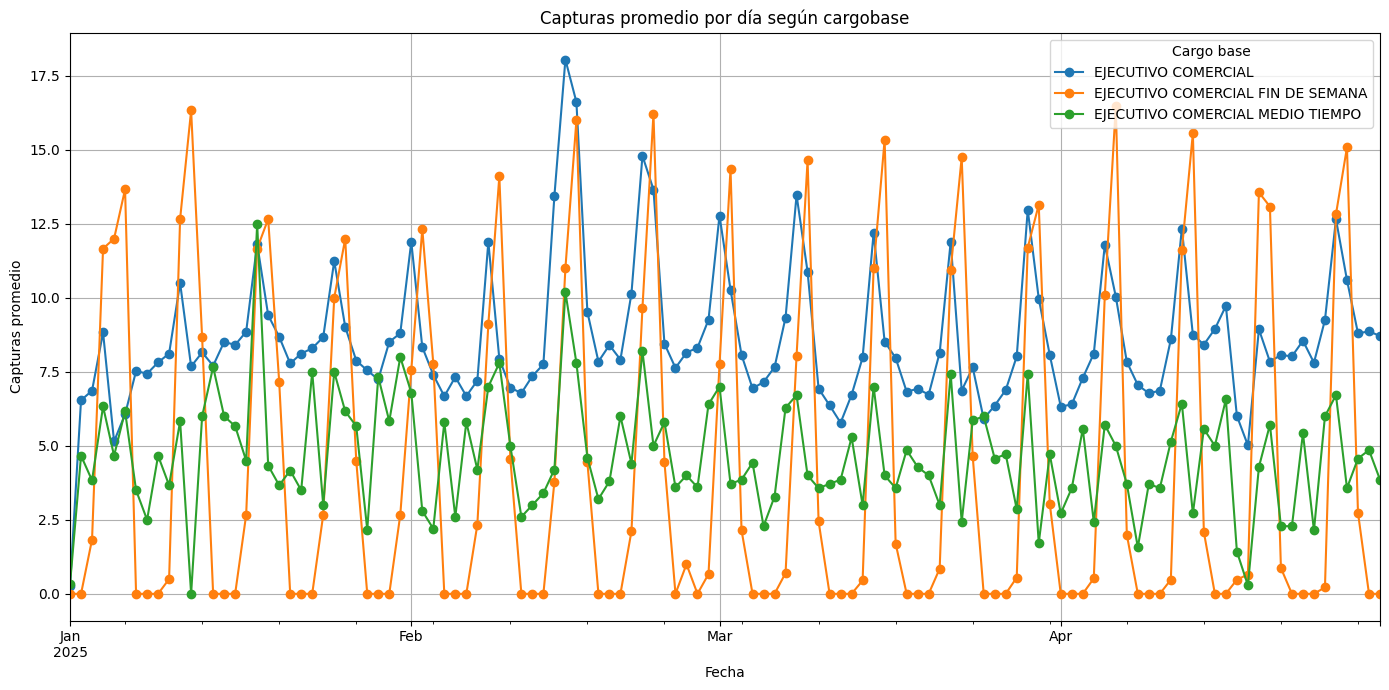

In [ ]:
# Agrupar por fecha y cargobase y calcular promedio diario para graficar
df_capt_tot_por_dias = productividad.groupby(['fecha_dia', 'cargobase'])['capt_tot'].mean().reset_index()

df_graficar = df_capt_tot_por_dias.pivot(index='fecha_dia', columns='cargobase', values='capt_tot')

plt.figure(figsize=(14, 7))
df_graficar.plot(figsize=(14, 7), marker='o')
plt.title("Capturas promedio por día según cargobase")
plt.xlabel("Fecha")
plt.ylabel("Capturas promedio")
plt.legend(title="Cargo base")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Agrupar por region y cargobase, y calcular promedio de capt_tot
promedios = productividad.groupby(['region', 'cargobase'])['capt_tot'].mean().reset_index()
promedios.rename(columns={'capt_tot': 'capturas_promedio'}, inplace=True)
promedios = promedios.sort_values(['region', 'capturas_promedio'], ascending=[True, False])
promedios

,region,cargobase,capturas_promedio
0,ALKOSTO,EJECUTIVO COMERCIAL,10.842166
1,ALKOSTO,EJECUTIVO COMERCIAL FIN DE SEMANA,5.638254
2,ALKOSTO,EJECUTIVO COMERCIAL MEDIO TIEMPO,4.942721
3,ANTIOQUIA,EJECUTIVO COMERCIAL,6.670230
4,ANTIOQUIA,EJECUTIVO COMERCIAL FIN DE SEMANA,2.556604
5,ANTIOQUIA,EJECUTIVO COMERCIAL MEDIO TIEMPO,2.439560
6,BOGOTA 1,EJECUTIVO COMERCIAL,6.958201
7,BOGOTA 1,EJECUTIVO COMERCIAL FIN DE SEMANA,2.628099
8,BOGOTA 2,EJECUTIVO COMERCIAL,6.968274
9,BOGOTA 2,EJECUTIVO COMERCIAL FIN DE SEMANA,2.044118


In [31]:
features = [
    'capturas_tarjetas', 'aprobacion_tarjetas', 'tarjetas',
    'capturas_creditos', 'aprobacion_creditos', 'cantidad_creditos',
    'monto_creditos', 'seguros', 'trafico_transaccional',
    'trafico_clientes', 'aprovechamiento_de_trafico', 'contribucion'
]

catt = catt.dropna(subset=features)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(catt[features])

kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
catt["cluster"] = kmeans.fit_predict(X_scaled)


cluster_summary = catt.groupby("cluster")[features].mean()
print(cluster_summary)

         capturas_tarjetas  aprobacion_tarjetas    tarjetas  \
cluster                                                       
0               416.648148             0.202453   78.629630   
1               841.905172             0.226356  172.198276   
2               295.713333             0.212435   55.650000   
3              2192.200000             0.220048  450.400000   

         capturas_creditos  aprobacion_creditos  cantidad_creditos  \
cluster                                                              
0                 0.000000             0.000000           0.000000   
1               289.318966             0.038821          29.344828   
2               104.350000             0.029739           8.113333   
3                 0.025000             0.000000           0.000000   

         monto_creditos     seguros  trafico_transaccional  trafico_clientes  \
cluster                                                                        
0              0.000000    0.000000     

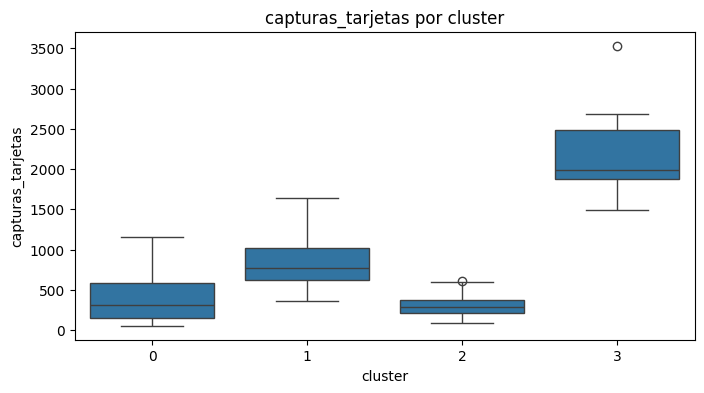

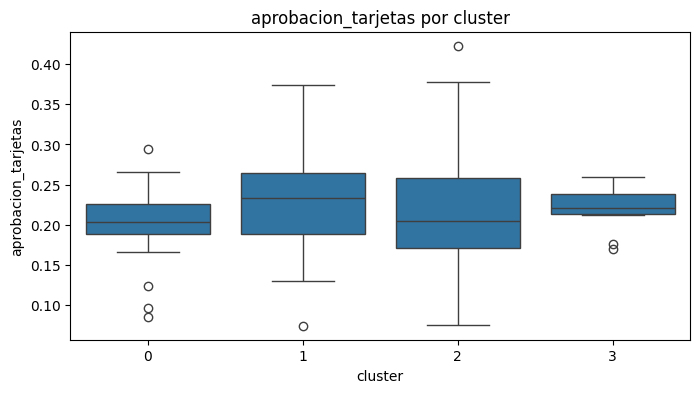

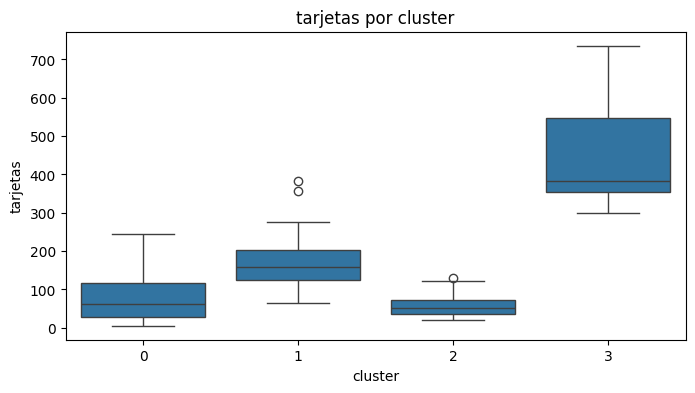

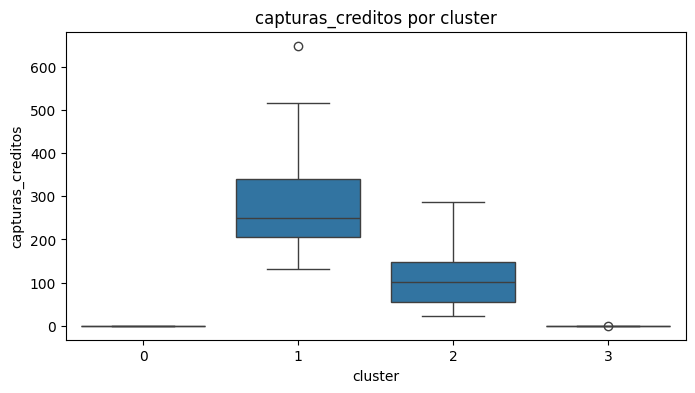

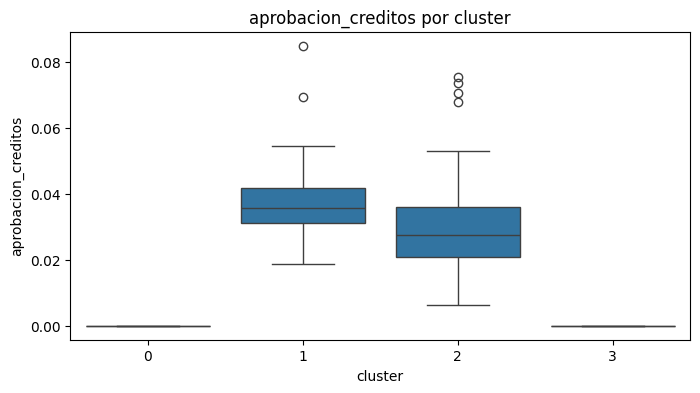

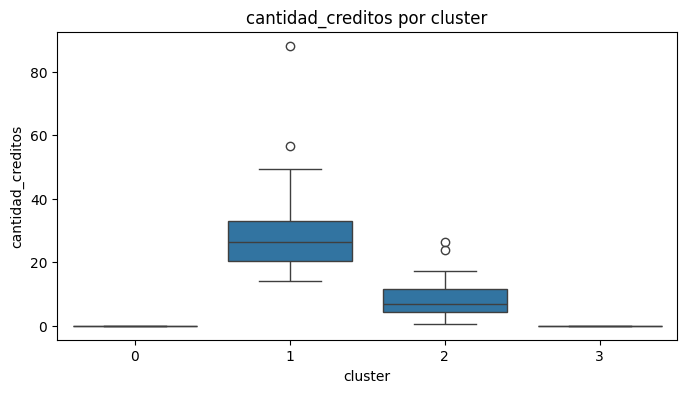

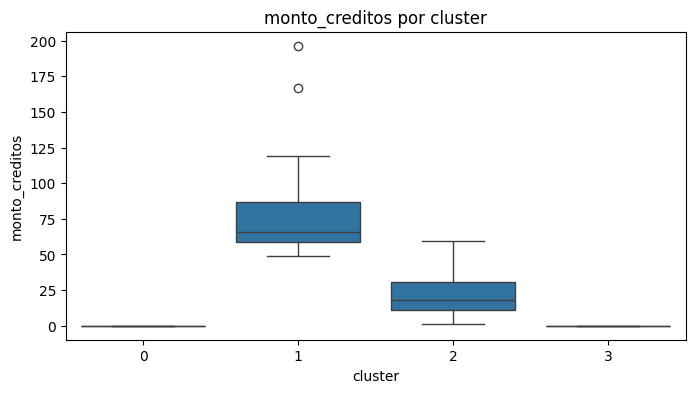

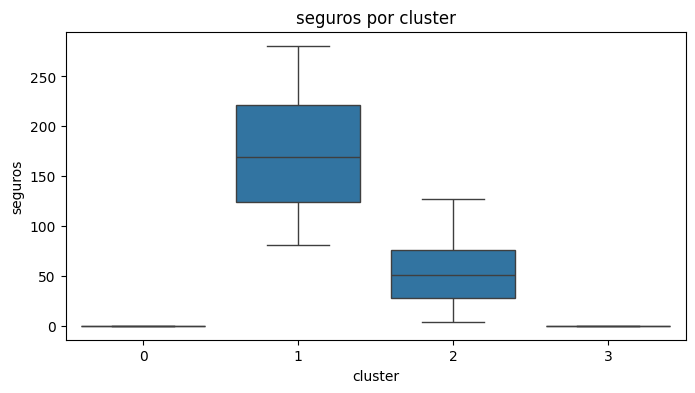

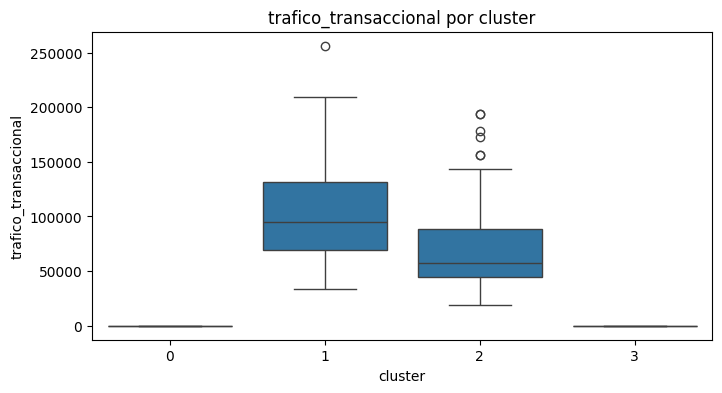

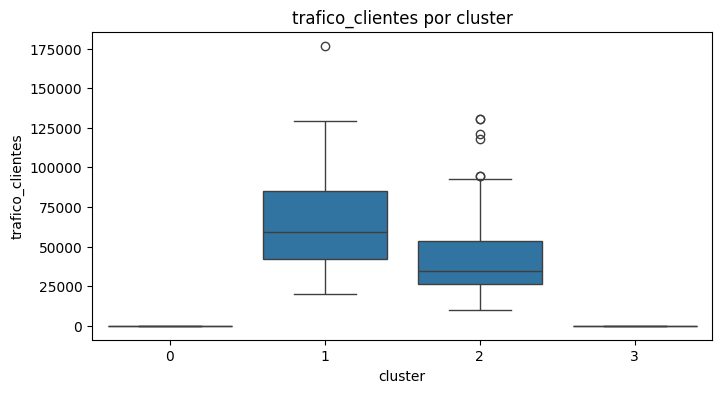

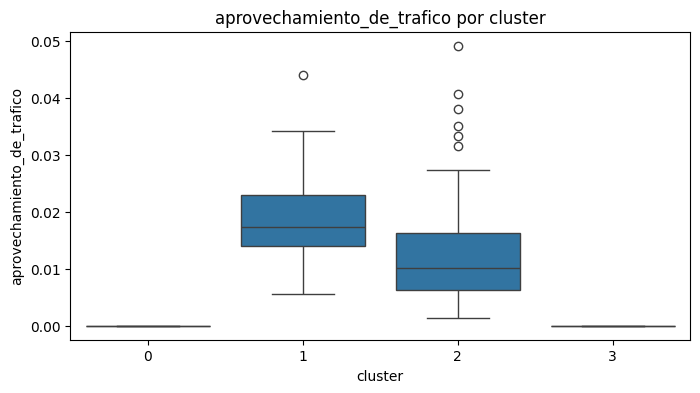

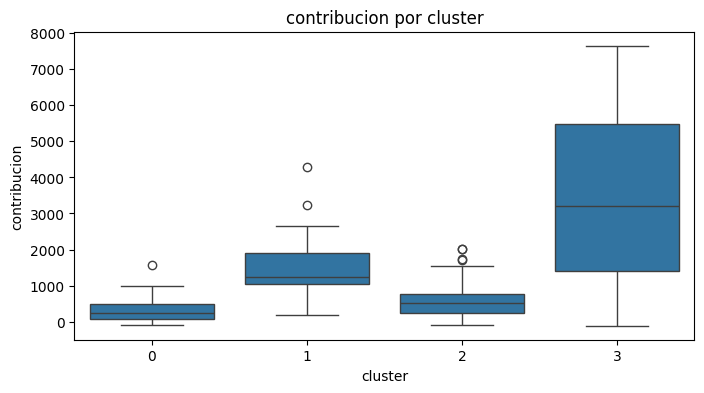

In [30]:
for var in features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x="cluster", y=var, data=catt)
    plt.title(f"{var} por cluster")
    plt.show()

In [37]:
clusters_1_2 = catt[catt["cluster"].isin([1, 2])]
clusters_1_2.to_excel("Puntos_influyentes.xlsx", index=False)
clusters_1_2

,negocio,region,canal,capturas_tarjetas,aprobacion_tarjetas,tarjetas,capturas_creditos,aprobacion_creditos,cantidad_creditos,monto_creditos,seguros,trafico_transaccional,trafico_clientes,aprovechamiento_de_trafico,contribucion,cluster
0,E,ANTIOQUIA,305001,591.25,0.29813,163.00,168.00,0.03384,18.50,53.43834,103.50,125108.25,87108.00,0.00845,2002.20802,1
1,E,ANTIOQUIA,305002,273.00,0.42289,109.00,36.50,0.01746,4.50,11.53701,75.50,143554.25,89312.75,0.00328,1535.21599,2
2,E,ANTIOQUIA,305003,1292.00,0.33203,383.50,243.75,0.02835,32.75,95.94125,251.75,256355.00,176842.00,0.00833,2265.08432,1
3,E,ANTIOQUIA,305004,1411.75,0.21167,269.25,648.75,0.06938,88.25,196.50499,280.75,209293.25,129557.00,0.01561,4278.34350,1
4,E,BOGOTA 2,305005,550.50,0.25549,122.25,113.00,0.01620,7.75,25.80312,75.50,74420.50,49449.25,0.01366,1552.20988,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,E,COSTAS,888586,381.00,0.12129,45.00,287.75,0.03235,12.00,34.73347,109.00,56030.25,32021.75,0.02060,-97.63620,2
100,E,BOGOTA 2,888587,572.25,0.19335,101.75,225.50,0.03848,20.25,65.59599,90.50,43277.00,27894.25,0.02838,909.94394,1
141,E,BOGOTA 1,305014,1024.75,0.23361,214.75,312.25,0.03971,36.50,119.04254,214.50,154765.75,94460.50,0.01391,1899.78072,1
142,E,BOGOTA 1,305015,306.75,0.32983,86.25,52.25,0.01147,3.00,11.08023,50.75,193489.75,130281.25,0.00268,2002.55625,2
